# Titanic: Machine Learning from Disaster

Objectives : Predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

#### Import necessary Libraries

In [125]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data scaling
from sklearn.preprocessing import StandardScaler

# Import seaborn and matplotlib with matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import kaggle 

print('Libraries imported.')

Libraries imported.


Download the data from Kaggle

In [5]:
!kaggle competitions download -c titanic


  0%|          | 0.00/59.8k [00:00<?, ?B/s]
100%|##########| 59.8k/59.8k [00:00<00:00, 3.91MB/s]

  0%|          | 0.00/28.0k [00:00<?, ?B/s]
100%|##########| 28.0k/28.0k [00:00<?, ?B/s]

  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 214kB/s]


## Data Extraction

In [48]:
X_train = pd.read_csv('train.csv')

In [49]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
Y_train = X_train[['PassengerId','Survived']]
Y_train = Y_train.set_index('PassengerId')
X_train = X_train.set_index('PassengerId')

In [51]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling

In [57]:
X_train['Sex'].replace('male', 1, inplace=True)
X_train['Sex'].replace('female', 0, inplace=True)
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [60]:
dummy_variable_1 = pd.get_dummies(X_train["Embarked"])
dummy_variable_1.rename(columns={'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace=True)
# drop original column "Embarked" from "X_train"
X_train.drop("Embarked", axis = 1, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
X_train = pd.concat([X_train, dummy_variable_1], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [64]:
X_train.drop(['Name','Ticket','Cabin'], axis = 1, inplace=True)

In [82]:
#Look if there is null variable in the tab
missing_data = X_train.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cherbourg
False    891
Name: Cherbourg, dtype: int64

Queenstown
False    891
Name: Queenstown, dtype: int64

Southampton
False    891
Name: Southampton, dtype: int64



We can see that there is a lot of people where we don't have any information on their age (25%). 
To solve this problem, let's put the mean instead of the NaN value

In [85]:
avg_age = X_train["Age"].mean(axis=0)
print("Average of Age:", avg_age)
X_train["Age"].replace(np.nan, avg_age, inplace=True)

Average of Age: 29.69911764705882


In [101]:
X_train_survived = X_train[X_train['Survived']==1]
X_train_dead = X_train[X_train['Survived']==0]

In [76]:
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1


## Exploratory Data Analysis

In [66]:
X_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


0    549
1    342
Name: Survived, dtype: int64


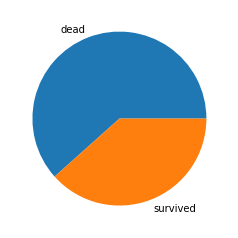

In [70]:
# Getting the count of people that leave and not
labelcounts=X_train['Survived'].value_counts()
print(labelcounts)

# Using matplotlib pie chart and label the pie chart
plt.pie(labelcounts,labels=['dead','survived']);

In [71]:
X_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Cherbourg,0.168240,-0.243292,-0.082853,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Queenstown,0.003650,0.221009,-0.074115,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624
Southampton,-0.155660,0.081720,0.125722,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000


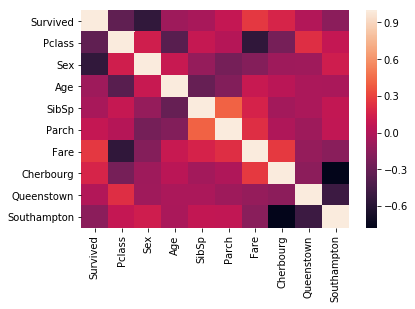

In [72]:
sns.heatmap(X_train.corr())

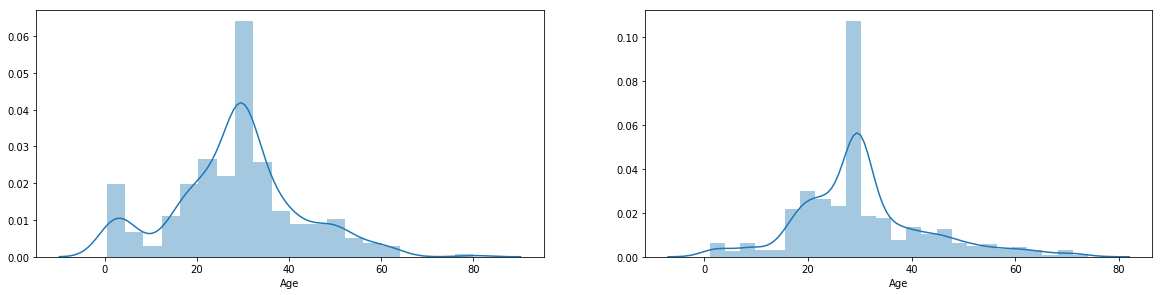

In [102]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# Tell pointplot to plot on ax1 with the ax argument (speed)
sns.distplot(X_train_survived['Age'],ax = ax1);
# Tell the factorplot to plot on ax2 with the ax argument (speed)
sns.distplot(X_train_dead['Age'],ax = ax2);

Based on the observation of the distribution of the age of people in the boat, I choose to separate the people between 3 groupes 

In [108]:
#0 : Child
#1 : Adult
#2 : Adult a little older
group_age = [0, 1, 2]

bins = [min(X_train['Age']), 18, 38, max(X_train['Age'])]
X_train['Age_binned'] = pd.cut(X_train['Age'], bins, labels=group_age, include_lowest=True )
X_train[['Age','Age_binned']].head()

,Age,Age_binned
PassengerId,,
1,22.0,1
2,38.0,1
3,26.0,1
4,35.0,1
5,35.0,1


In [116]:
X_train_bar = X_train_survived.groupby(['Sex']).count()
X_train_bar2 = X_train_dead.groupby(['Sex']).count()

X_train_bar = X_train_bar[['Pclass']]
X_train_bar2 = X_train_bar2[['Pclass']]
X_train_bar

,Pclass
Sex,
0,233
1,109


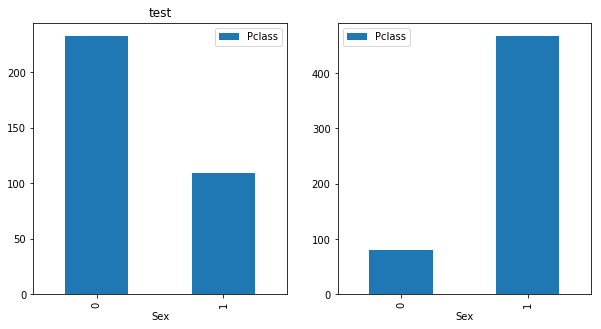

In [123]:
fig = plt.figure(figsize = (10,5)) # create figure
ax1 = fig.add_subplot(1, 2, 1)

ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title("test")


X_train_bar.plot(kind='bar',ax = ax1)
X_train_bar2.plot(kind='bar', ax = ax2)

plt.show()

## Machine learning Application

In [142]:
X_train2 = X_train[['Survived','Sex','Age_binned','Pclass']]

In [161]:
import numpy as np
from sklearn import preprocessing,neighbors,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, jaccard_similarity_score, log_loss

#dropping left and sales X for the df, y for the left
X = X_train2.drop(['Survived'],axis=1)
X = np.asarray(X)

y = X_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

scaler = StandardScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
scaler = StandardScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

LR = LogisticRegression(solver='liblinear').fit(X_train_scaled,y_train)
yhat = LR.predict(x_test_scaled)

D:\GaelB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\GaelB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\GaelB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\GaelB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [163]:
# Find the accuracy through the scoring process
#0.7877094972067039
accuracy = LR.score(x_test_scaled,y_test)
print("Accuracy : ", accuracy)
print ("Classification report : \n" + classification_report(y_test, yhat))

Accuracy :  0.7877094972067039
Classification report : 
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       106
           1       0.78      0.67      0.72        73

   micro avg       0.79      0.79      0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



## Prediction on the test data

In [174]:
X_test = pd.read_csv('test.csv')
#X_test = X_test.set_index('PassengerId')
X_test['Sex'].replace('male', 1, inplace=True)
X_test['Sex'].replace('female', 0, inplace=True)

dummy_variable_1 = pd.get_dummies(X_test["Embarked"])
dummy_variable_1.rename(columns={'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace=True)
# drop original column "Embarked" from "X_train"
X_test.drop("Embarked", axis = 1, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
X_test = pd.concat([X_test, dummy_variable_1], axis=1)

#X_test.drop(['Name','Ticket','Cabin'], axis = 1, inplace=True)

avg_age = X_test["Age"].mean(axis=0)
X_test["Age"].replace(np.nan, avg_age, inplace=True)

group_age = [0, 1, 2]
bins = [min(X_test['Age']), 18, 38, max(X_test['Age'])]
X_test['Age_binned'] = pd.cut(X_test['Age'], bins, labels=group_age, include_lowest=True )
X_test[['Age','Age_binned']].head()

X = X_test[['Sex','Age_binned','Pclass']]
X = np.asarray(X)

scaler = StandardScaler()
scaler.fit(X)
X_test_scaled = scaler.transform(X)
yhat = LR.predict(X_test_scaled)

D:\GaelB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\GaelB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [182]:
result = X_test[['PassengerId']]
result['Survived'] = yhat

D:\GaelB\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [183]:
#result = pd.DataFrame(clfsvm.predict(X_test),y_test,columns=['ytest']).head()
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [186]:
result.to_csv('submission.csv', index=False)

In [187]:
!kaggle competitions submit -c titanic -f submission.csv -m "1st try"

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 31.9kB/s]
